# EC1B1 Coursework Group 9 -Italy

# 1. Downloading the Data and import libraries
Datasets for Italy and US are downloaded from the IMF for the time series from January 1960 to December 1990 as two excel files (dates as the rows and variables as the columns). Please direct to https://github.com/Yishu26/ec1b1-group9-datasets.git and download the two excel files as our raw datasets. If unsuccessful, follow the steps below to donwload from IMF.

Firstly, navigate to the International Monetary Fund’s “International Financial Statistics” website through the link: https://data.imf.org/?sk=4c514d48-b6ba-49ed-8ab9-52b0c1a0179b <br>

Then, click "Query" on the website page. <br>

For Italy's data<br>
In the Rows section: <br>
    Set a time variable, filter the time as monthly data from January 1960 to December 1990.<br>
    
In the Columns section: <br>
    Set a country variable, filter Italy and apply.<br>
    Set an indicator variable, filter the following indicators and apply:<br>
    (i) Economic Activity, Industrial Production, Index<br>
    (ii) Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate<br>
    (iii) Consumer prices (All items), index<br>
    (iv) International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)<br>
Then, export the data as an excel file. Name it Italy.<br>

For US's data<br>
In the Rows section: <br>
    Set a time variable, filter the time as monthly data from January 1960 to December 1990.<br>
    
In the Columns section: <br>
    Set a country variable, filter United States and apply.<br>
    Set an indicator variable, filter the following indicators and apply:<br>
    (i) Consumer prices (All items), index<br>
    (ii) International Reserves and Liquidity (Reserves, Official Reserve Assets, US Dollar)<br>
Then, export the data as an excel file. Name it US.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 2. Cleaning the data

1. Import datasets and removed the header row titled "International Financial Statistics (IFS)" 

For the two excel files downloaded, copy the file location (file path) of each file and replace the below file location in pd.read_excel("") respectively for Italy and US.

In [2]:
italy = pd.read_excel("/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/EC1B1/Coursework/Italy.xlsx", header=None)
us = pd.read_excel("/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/EC1B1/Coursework/US.xlsx", header=None)

2. Remove country column "Italy" and "US". We will incorporate country names into column names to make data processing easier.
Name the first date column as "date" (Note: the column name is blank in the original dataset)

In [3]:
italy= italy.drop(italy.index[:2])
italy.iloc[0,0]="date"
italy.columns = italy.iloc[0]
italy = italy.drop(italy.index[0])

us= us.drop(us.index[:2])
us.iloc[0,0]="date"
us.columns = us.iloc[0]
us = us.drop(us.index[0])

3. Incorporate country names into column names and shorten column names to make them easier to read and process.

In [4]:
corrections_ita = {
    "date": "date",
    "Economic Activity, Industrial Production, Index": "industrial_production_ita",
    "Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate": "exchange_rate_ita",
    "International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar": "reserve_dollar_ita",
    "Prices, Consumer Price Index, All items, Index": "cpi_index_ita"
}
italy.columns = italy.columns.map(corrections_ita)

corrections_us = {
    "date": "date",
    "International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar": "reserve_dollar_us",
    "Prices, Consumer Price Index, All items, Index": "cpi_index_us"
}
us.columns = us.columns.map(corrections_us)

4. Change the datatype of all the variable columns to the "float" type to make them easier for constructing new variables.

In [5]:
italy[["industrial_production_ita", "exchange_rate_ita", "reserve_dollar_ita","cpi_index_ita"]] = italy[["industrial_production_ita", "exchange_rate_ita", "reserve_dollar_ita","cpi_index_ita"]].astype(float)
us[["reserve_dollar_us","cpi_index_us"]] = us[["reserve_dollar_us","cpi_index_us"]].astype(float)

5. The downloaded datasets contain annual data, but we only need monthly data, so we delete the annual data rows for both datasets.

In [6]:
italy = italy.iloc[1:]
italy = italy.drop(italy.index[12::13])
us = us.iloc[1:]
us = us.drop(us.index[12::13])

6. We merged the two datasets into one dataset called "merged"

In [7]:
merged = pd.merge(italy, us, on='date', how='inner')

7. We formatted the month and year variable into a date format

In [8]:
merged['date'] = pd.to_datetime(merged['date'], format='%b %Y')
merged['date'] = merged['date'].dt.to_period('M')

8. We checked if there is any missing data in our dataset. It turns out that there is no missing data.

In [9]:
merged.isnull().sum()

2
date                         0
industrial_production_ita    0
exchange_rate_ita            0
reserve_dollar_ita           0
cpi_index_ita                0
reserve_dollar_us            0
cpi_index_us                 0
dtype: int64

9. We use the IQR method to identify the outliers in the raw data. Any data points that are more than 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3) are considered potential outliers.

In [10]:
for col in merged.columns[1:]:
    Q1 = merged[col].quantile(0.25)
    Q3 = merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = merged[(merged[col] < lower_bound) | (merged[col] > upper_bound)]
    print(f"{col}:{len(outliers)}")

industrial_production_ita:0
exchange_rate_ita:0
reserve_dollar_ita:0
cpi_index_ita:0
reserve_dollar_us:18
cpi_index_us:0


From the output printed above, we see that there are 18 potential outliers in the reserve_dollar_us (US international reserve) column. We will then print the rows corresponding to these 18 potential outliers and plot the graph of reserve_dollar_us against date to see if they are true outliers.

Empty DataFrame
Columns: [date, industrial_production_ita, exchange_rate_ita, reserve_dollar_ita, cpi_index_ita, reserve_dollar_us, cpi_index_us]
Index: []
Empty DataFrame
Columns: [date, industrial_production_ita, exchange_rate_ita, reserve_dollar_ita, cpi_index_ita, reserve_dollar_us, cpi_index_us]
Index: []
Empty DataFrame
Columns: [date, industrial_production_ita, exchange_rate_ita, reserve_dollar_ita, cpi_index_ita, reserve_dollar_us, cpi_index_us]
Index: []
Empty DataFrame
Columns: [date, industrial_production_ita, exchange_rate_ita, reserve_dollar_ita, cpi_index_ita, reserve_dollar_us, cpi_index_us]
Index: []
2       date  industrial_production_ita  exchange_rate_ita  \
354  1989-07                 109.244545            1371.00   
355  1989-08                  50.939403            1383.52   
356  1989-09                 113.780981            1405.30   
357  1989-10                 113.076640            1369.23   
358  1989-11                 115.297106            1343.54   
359 

<Axes: title={'center': 'US international reserve'}, xlabel='date'>

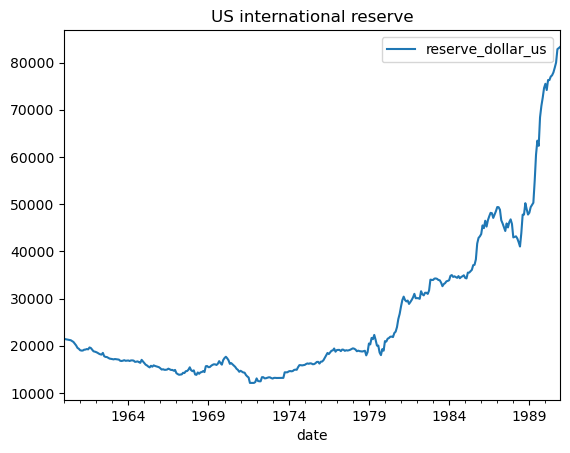

In [11]:
for col in merged.columns[1:]:
    Q1 = merged[col].quantile(0.25)
    Q3 = merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = merged[(merged[col] < lower_bound) | (merged[col] > upper_bound)]
    print(outliers)

merged.plot(kind='line', x='date', y='reserve_dollar_us', legend = True, title = 'US international reserve')

We find that the 18 outliers are consecutive data from July 1989 to December 1990, so we conclude that they are not outliers but an increasing trend in US dollar reserves in the late 1980s.

# 3. Constructing new variables
1. For Italy, we will construct the variables below<br>
(i) The monthly growth in the nominal exchange rate<br>
(ii) The real exchange rate<br>
(iii) The monthly growth in the real exchange rate<br>
(iv) The monthly inflation rate<br>
(v) The monthly growth in industrial production<br>
(vi) The growth in industrial production versus 12 months ago<br>
(vii) An index of the value of international reserves (value of reserves at January 1960 = 100)

(i) The monthly growth in the nominal exchange rate is calculated by:

$$ \frac{ER_t - ER_{t-1}}{ER_{t-1}} \times 100 $$

In [12]:
#monthly growth in nominal exchange rate
merged['nominal_exchange_rate_growth_ita_monthly'] = (merged['exchange_rate_ita'] - merged['exchange_rate_ita'].shift(1)) / merged['exchange_rate_ita'].shift(1) * 100

(ii) The real exchange rate is calculated by:

$$ \frac{CPI_t^{Ita}}{CPI_t^{US}} \times {ER_t^{Ita}} $$

In [13]:
#real exchange rate
merged['real_exchange_rate_ita'] = merged['exchange_rate_ita'] * (merged['cpi_index_ita'] / merged['cpi_index_us'])

(iii) The monthly growh in real exchange rate is calculated by:
$$ \frac{{RER_t^{Ita}}-{RER_{t-1}^{Ita}}} {RER_{t-1}^{Ita}}\times 100 $$

In [14]:
#monthly growth in real exchange rate
merged['real_exchange_rate_growth_ita_monthly'] = (merged['real_exchange_rate_ita'] - merged['real_exchange_rate_ita'].shift(1)) / merged['real_exchange_rate_ita'].shift(1) * 100

(iv) The monthly inflation rate is calculated by:
$$ \frac{CPI_t - CPI_{t-1}}{CPI_{t-1}} $$

In [15]:
#monthly inflation rate
merged['inflation_ita_monthly'] = (merged['cpi_index_ita'] - merged['cpi_index_ita'].shift(1)) / merged['cpi_index_ita'].shift(1) * 100
merged['inflation_us_monthly'] = (merged['cpi_index_us'] - merged['cpi_index_us'].shift(1)) / merged['cpi_index_us'].shift(1) * 100

(v) The monthly growth in industrial production is calculated by:
$$ \frac{{IP_t^{Ita}}-{IP_{t-1}^{Ita}}} {IP_{t-1}^{Ita}}\times 100 $$

In [16]:
#monthly growth in industrial production
merged['industry_production_growth_ita_monthly'] = (merged['industrial_production_ita'] - merged['industrial_production_ita'].shift(1)) / merged['industrial_production_ita'].shift(1) * 100

(vi) The growth in industrial production vs 12 months ago is calculated by:
$$ \frac{{IP_t^{Ita}}-{IP_{t-12}^{Ita}}} {IP_{t-12}^{Ita}}\times 100 $$

In [17]:
#The growth in industrial production vs 12 months ago
merged['industrial_production_ita_12ms_ago'] = merged['industrial_production_ita'].shift(12)
merged['industrial_production_growth_ita_12ms'] = (merged['industrial_production_ita'] - merged['industrial_production_ita_12ms_ago']) / merged['industrial_production_ita_12ms_ago'] * 100
merged = merged.drop(columns=['industrial_production_ita_12ms_ago'])

(vii) Index of the value of international reserves is calculated by:
$$ \frac{\text{Reserve in a month}}{\text{Reserve in Jan 1960}} \times 100 $$

In [18]:
#index of the value of international reserves
reserve_ita_01_1960 = merged.loc[merged['date'] == '1960-01', 'reserve_dollar_ita'].iloc[0]
merged['international_reserve_ita_index'] = (merged['reserve_dollar_ita'] / reserve_ita_01_1960) * 100

reserve_us_01_1960 = merged.loc[merged['date'] == '1960-01', 'reserve_dollar_us'].iloc[0]
merged['international_reserve_us_index'] = (merged['reserve_dollar_us'] / reserve_us_01_1960) * 100

2. We will then check the outliers of the new dataset.

In [19]:
for col in merged.columns[1:]:
    Q1 = merged[col].quantile(0.25)
    Q3 = merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = merged[(merged[col] < lower_bound) | (merged[col] > upper_bound)]
    print(f"{col}:{len(outliers)}")

industrial_production_ita:0
exchange_rate_ita:0
reserve_dollar_ita:0
cpi_index_ita:0
reserve_dollar_us:18
cpi_index_us:0
nominal_exchange_rate_growth_ita_monthly:89
real_exchange_rate_ita:0
real_exchange_rate_growth_ita_monthly:42
inflation_ita_monthly:9
inflation_us_monthly:14
industry_production_growth_ita_monthly:70
industrial_production_growth_ita_12ms:4
international_reserve_ita_index:0
international_reserve_us_index:18


Apart from US international reserce related variables, there are 6 variables with potential outliers. We will firstly print the overview of the dataset and then plot a simple trend graph for each of these variables with potential outliers to see if there are any true outliers that should be removed.

In [20]:
merged.describe()

2,industrial_production_ita,exchange_rate_ita,reserve_dollar_ita,cpi_index_ita,reserve_dollar_us,cpi_index_us,nominal_exchange_rate_growth_ita_monthly,real_exchange_rate_ita,real_exchange_rate_growth_ita_monthly,inflation_ita_monthly,inflation_us_monthly,industry_production_growth_ita_monthly,industrial_production_growth_ita_12ms,international_reserve_ita_index,international_reserve_us_index
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,371.000000,372.000000,371.000000,371.000000,371.000000,371.000000,360.000000,372.000000,372.000000
mean,73.080033,920.892682,23677.779195,19.423168,25741.057673,29.899658,0.178735,572.009230,0.481709,0.712582,0.410813,3.735596,3.926568,792.031416,119.847927
std,23.324885,388.914702,23785.912393,17.120590,15579.415014,15.475364,1.936435,461.524089,2.098226,0.588032,0.349335,30.148436,6.723100,795.648516,72.536281
min,27.445439,564.450000,2923.500000,4.125971,12127.810000,13.436946,-6.144796,190.008495,-5.565243,-0.221313,-0.457457,-58.587563,-18.965946,97.792273,56.465935
25%,50.479790,625.000001,4899.365753,5.641792,15749.100000,15.443316,-0.226635,215.595660,-0.344578,0.283995,0.201364,-3.390290,-0.434758,163.885792,73.326318
50%,75.519724,666.415000,6563.708713,10.446978,18846.327864,24.718478,0.000000,274.292079,0.176676,0.558147,0.331126,0.344573,4.115773,219.558746,87.746718
75%,93.140197,1244.002500,43926.123751,34.045730,33678.061330,45.080266,0.713024,1054.216822,1.270417,1.040906,0.584840,3.171978,8.619550,1469.346839,156.801865
max,115.588303,2083.670000,94282.568583,57.378693,83316.214608,61.360525,9.272569,1775.233006,11.285788,3.180423,1.805869,153.682589,20.396505,3153.790553,387.912407


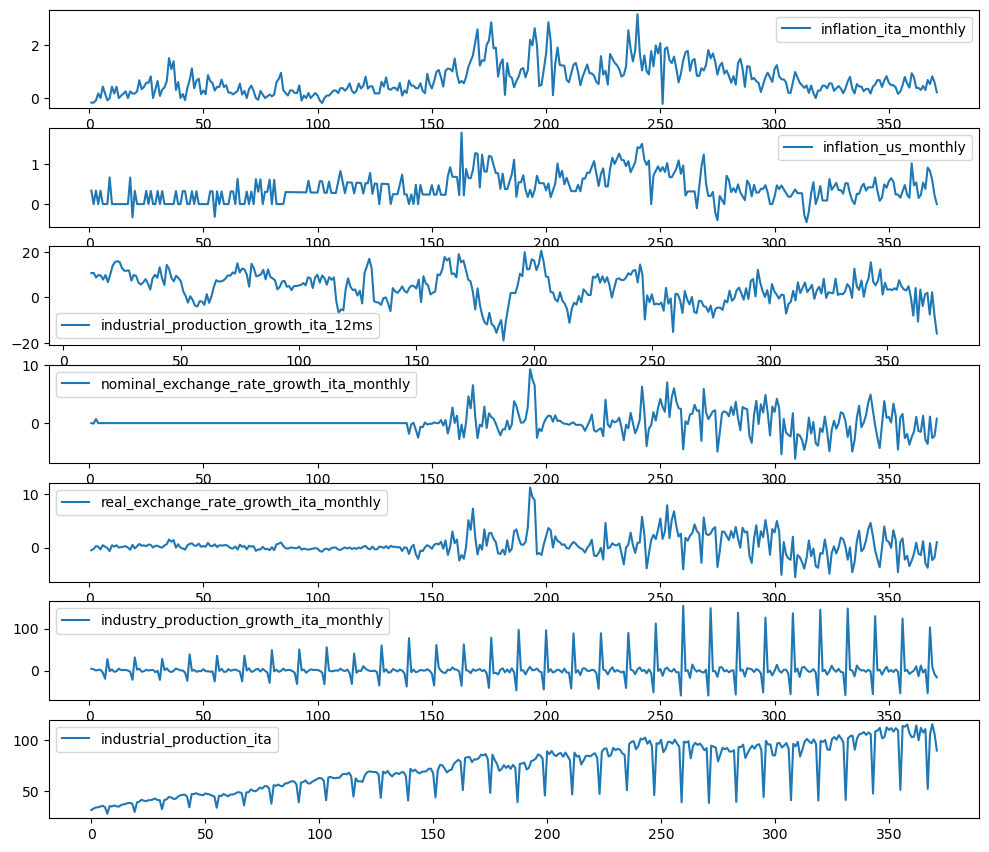

In [21]:
columns_to_plot = ['inflation_ita_monthly', 'inflation_us_monthly', 'industrial_production_growth_ita_12ms', 'nominal_exchange_rate_growth_ita_monthly','real_exchange_rate_growth_ita_monthly', 'industry_production_growth_ita_monthly', 'industrial_production_ita']
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(12, len(columns_to_plot)*1.5))

for i, col in enumerate(columns_to_plot):
    axs[i].plot(merged.index, merged[col], label=col)
    axs[i].legend()
plt.show()

We can see that for the first five variables, the volatitly is normal and there are no extreme values that are suspicious. With reference to the descriptive overview of the dataset, the common reason for the potential outliers to exist in the monthly variables is that their standard deviations are usually small. The maximum and minimum values, though, are generally reasonable and acceptable.

While for the variable 'industry_production_growth_ita_monthly', there shows some cyclical ups and downs. So we added another trend plot of its row data to the above process to investigate the reasonability of the raw data. From the raw data, we observe that there was a cyclical decline in industrial production every August in Italy. In Italy, like in many other European countries, August is traditionally a month when many businesses close or operate at reduced capacity due to summer vacations. This can lead to a decrease in industrial production during that month. We conclude those are due to seasonal reasons as in Italy, like in many other European countries, August is traditionally a month when many businesses close or operate at reduced capacity due to summer vacations. This can lead to a decrease in industrial production during that month.

Therefore, there is still not outliers that need to be interpolated.

# 4. End product
We print our full merged dataset below.

In [22]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

merged

2,date,industrial_production_ita,exchange_rate_ita,reserve_dollar_ita,cpi_index_ita,reserve_dollar_us,cpi_index_us,nominal_exchange_rate_growth_ita_monthly,real_exchange_rate_ita,real_exchange_rate_growth_ita_monthly,inflation_ita_monthly,inflation_us_monthly,industry_production_growth_ita_monthly,industrial_production_growth_ita_12ms,international_reserve_ita_index,international_reserve_us_index
0,1960-01,31.134278,621.118012,2989.500000,4.143942,21478.100000,13.436946,NaN,191.552239,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000
1,1960-02,32.602650,621.118012,2958.500000,4.136754,21395.700000,13.482806,0.000000e+00,190.569544,-0.513017,-0.173471,0.341297,4.716258,NaN,98.963037,99.616353
2,1960-03,33.712883,620.600000,2923.500000,4.129566,21344.700000,13.482806,-8.340000e-02,190.079779,-0.257001,-0.173746,0.000000,3.405346,NaN,97.792273,99.378902
3,1960-04,33.891953,625.000001,2959.500000,4.125971,21278.000000,13.528666,7.089914e-01,190.612448,0.280235,-0.087050,0.340136,0.531161,NaN,98.996488,99.068353
4,1960-05,34.632109,625.000001,2970.500000,4.133160,21234.300000,13.528666,0.000000e+00,190.944545,0.174226,0.174226,0.000000,2.183868,NaN,99.364442,98.864890
5,1960-06,35.372264,625.000001,2997.500000,4.133160,21169.800000,13.574526,0.000000e+00,190.299462,-0.337838,0.000000,0.338983,2.137194,NaN,100.267603,98.564584
6,1960-07,33.891953,625.000001,3088.500000,4.151131,20999.400000,13.574526,0.000000e+00,191.126874,0.434795,0.434795,0.000000,-4.184948,NaN,103.311591,97.771218
7,1960-08,27.445439,625.000001,3201.500000,4.158318,20803.400000,13.574526,0.000000e+00,191.457799,0.173144,0.173144,0.000000,-19.020782,NaN,107.091487,96.858661
8,1960-09,35.002186,625.000001,3193.500000,4.154724,20430.000000,13.574526,0.000000e+00,191.292336,-0.086422,-0.086422,0.000000,27.533710,NaN,106.823884,95.120146
9,1960-10,34.632109,625.000001,3174.500000,4.154724,20068.200000,13.666246,0.000000e+00,190.008495,-0.671141,0.000000,0.675676,-1.057299,NaN,106.188326,93.435639


# 5. Exit of Bretton Woods
Determine the  time at which Italy left the Bretton Woods

Since in a Bretton Woods system, the nominal exchange rate is fixed. We will try to find out the first date at which there is a change in the nominal exchange rate growth.

In [23]:
non_zero_non_null = merged.loc[(merged['nominal_exchange_rate_growth_ita_monthly'] != 0) & merged['nominal_exchange_rate_growth_ita_monthly'].notna(), 'date']
sorted_dates = non_zero_non_null.sort_values()
first_nonzero_date = sorted_dates.iloc[0]
print(first_nonzero_date)

1960-03


We find the result is March 1960, but we doubt if it was the exact time when Italy exited. So we printed the first 20 nominal exchange rate growth values to check.

In [24]:
print(merged[["date", "nominal_exchange_rate_growth_ita_monthly"]].head(20))

2      date  nominal_exchange_rate_growth_ita_monthly
0   1960-01                                       NaN
1   1960-02                                  0.000000
2   1960-03                                 -0.083400
3   1960-04                                  0.708991
4   1960-05                                  0.000000
5   1960-06                                  0.000000
6   1960-07                                  0.000000
7   1960-08                                  0.000000
8   1960-09                                  0.000000
9   1960-10                                  0.000000
10  1960-11                                  0.000000
11  1960-12                                  0.000000
12  1961-01                                  0.000000
13  1961-02                                  0.000000
14  1961-03                                  0.000000
15  1961-04                                  0.000000
16  1961-05                                  0.000000
17  1961-06                 

The output shows that there were two fluctuations in Mar 1960 and April 1960. However, after these two slight flucuations, the nominal exchange rate growth kept zero for the folloing 16 months. Hence, we conclude that Mar 1960 is not the exact exit date. The possible reason for the two minor flucuations is that Italy faced constraints on their ability to adjust exchange rates in response to economic imbalances. Then, we will try to find the third date when there is a change in the nominal exchange rate growth.

In [25]:
third_nonzero_date = sorted_dates.iloc[2]
print(third_nonzero_date)

1971-08


The new output is August 1971, which seems reasonable. Again we confirm it by plotting the folloing 10 values of nominal exchange rate growth after Aug 1971.

In [26]:
third_date_idx = merged[merged['date'] == third_nonzero_date].index[0]

# Print the following 10 values of 'nominal_exchange_rate_growth_ita_monthly' column
print(merged[['date', 'nominal_exchange_rate_growth_ita_monthly']].iloc[third_date_idx+1:third_date_idx+11])

2       date  nominal_exchange_rate_growth_ita_monthly
140  1971-09                                 -1.840000
141  1971-10                                 -0.184189
142  1971-11                                  0.060421
143  1971-12                                 -1.148698
144  1972-01                                 -2.481663
145  1972-02                                 -0.646723
146  1972-03                                 -0.698645
147  1972-04                                  0.116688
148  1972-05                                 -0.233104
149  1972-06                                 -0.115106


From the output, we can confirm that the following values for nominal exchange rate growth after Aug 1971 were all fluctuating, so we conclude that Aug 1971 is the time when Italy exit the Bretton Woods system.

# 6. Graph plotting

1. Monthly growth in nominal exchange rates of Italy, versus the US dollar

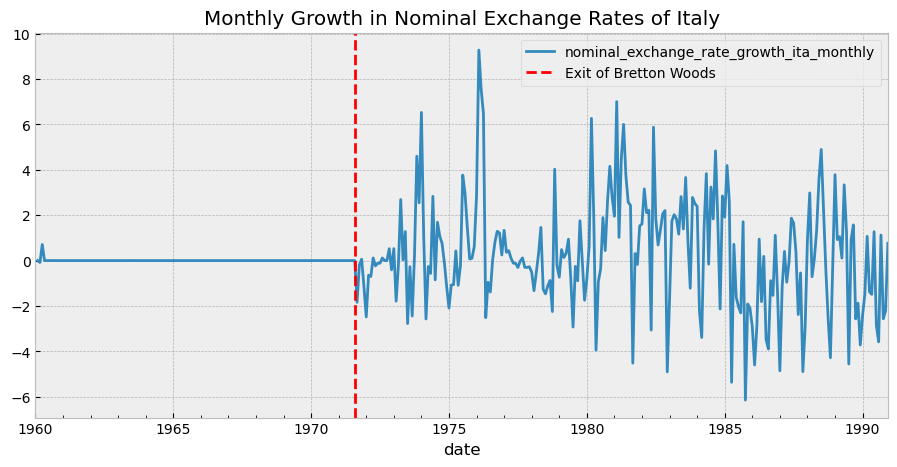

In [27]:
from matplotlib.dates import YearLocator, DateFormatter

plt.style.use('bmh')
ax = merged.plot(kind='line', x='date', y='nominal_exchange_rate_growth_ita_monthly', legend=True, title='Monthly Growth in Nominal Exchange Rates of Italy', figsize=(11, 5))

ax.xaxis.set_major_locator(YearLocator(base=5))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

tick_years = range(1960, 1991, 5)
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in tick_years]))
ax.set_xticklabels(tick_years)

# Here we darw a vertical red line to represent the date when Italy exited the Bretton Woods system in August 1971.
plt.axvline(pd.to_datetime('1971-08'), color='red', linestyle='--', lw=2, label='Exit of Bretton Woods')
plt.legend()
plt.savefig('Monthly growth in nominal exchange rates.png')

2. Monthly growth in real exchange rates of Italy, versus the US dollar

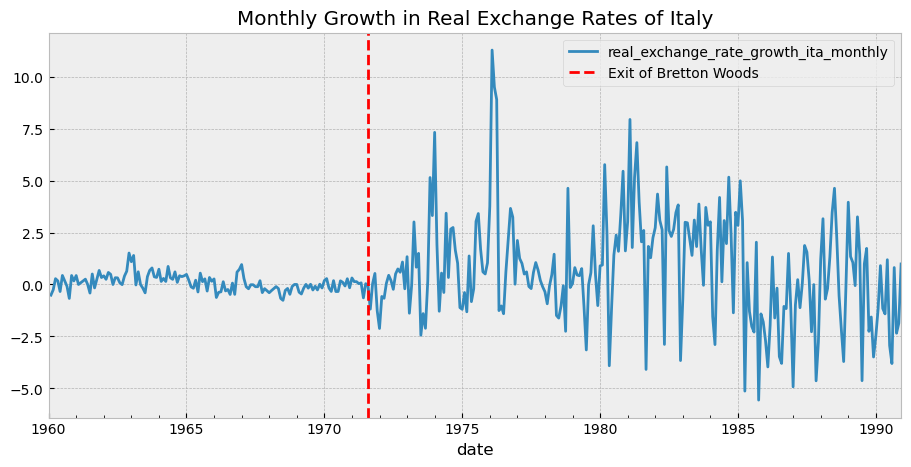

In [28]:
ax=merged.plot(kind='line', x='date', y='real_exchange_rate_growth_ita_monthly', legend=True, title= "Monthly Growth in Real Exchange Rates of Italy", figsize=(11, 5))
ax.xaxis.set_major_locator(YearLocator(base=5))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

tick_years = range(1960, 1991, 5)
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in tick_years]))
ax.set_xticklabels(tick_years)

plt.axvline(pd.to_datetime('1971-08'), color='red', linestyle='--', lw=2, label='Exit of Bretton Woods')
plt.legend()
plt.savefig('Monthly growth in real exchange rates.png')

3. Real exchange rate level of Italy, versus the US dollar

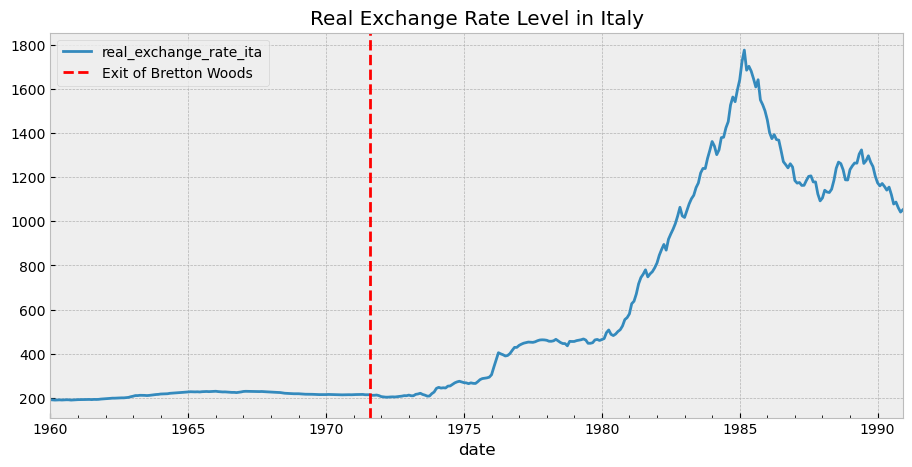

In [29]:
ax=merged.plot(kind='line', x='date', y='real_exchange_rate_ita', legend=True, title= "Real Exchange Rate Level in Italy", figsize=(11, 5))
ax.xaxis.set_major_locator(YearLocator(base=5))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

tick_years = range(1960, 1991, 5)
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in tick_years]))
ax.set_xticklabels(tick_years)

plt.axvline(pd.to_datetime('1971-08'), color='red', linestyle='--', lw=2, label='Exit of Bretton Woods')
plt.legend()
plt.savefig('Real exchange rate level.png')

4. Monthly indexed value of international reserves of Italy and the US from January 1960 until the exit of the US from Bretton Woods(August 1971).

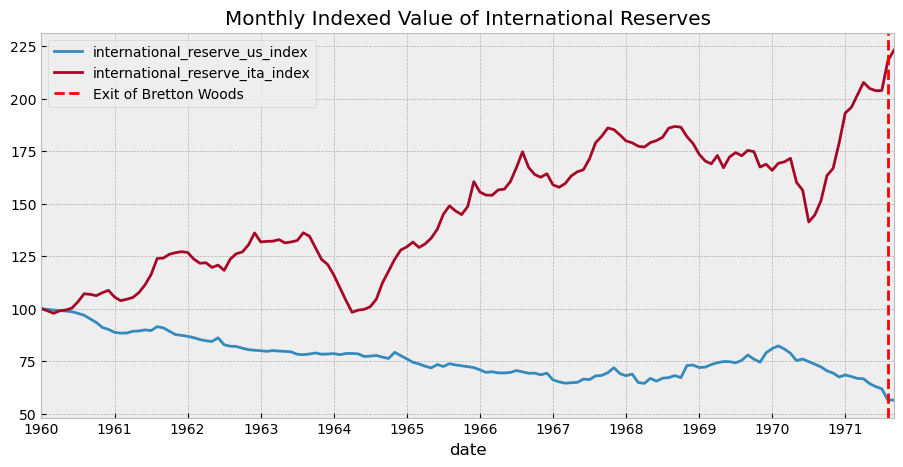

In [30]:
# Filter data up to September 1971
merged_filtered = merged[merged['date'] <= '1971-09']
ax= merged_filtered.plot(kind='line', x='date', y=['international_reserve_us_index','international_reserve_ita_index'], legend = True, title = 'Monthly Indexed Value of International Reserves', figsize=(11, 5))
ax.xaxis.set_major_locator(YearLocator(base=5))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

tick_years = range(1960, 1972, 1)
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in tick_years]))
ax.set_xticklabels(tick_years)

plt.axvline(pd.to_datetime('1971-08'), color='red', linestyle='--', lw=2, label='Exit of Bretton Woods')
plt.legend()
plt.savefig('Monthly indexed value of international reserves.png')

5. Monthly inflation

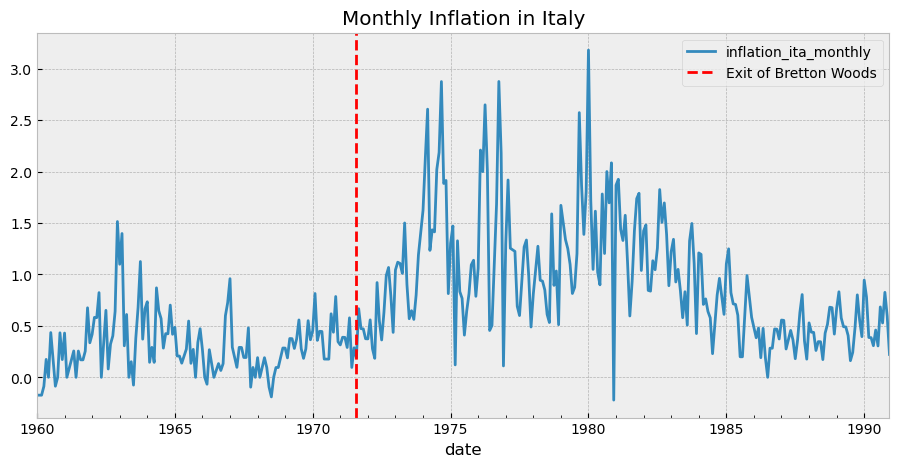

In [31]:
ax=merged.plot(kind='line', x='date', y='inflation_ita_monthly', legend=True, title= "Monthly Inflation in Italy", figsize=(11, 5))
ax.xaxis.set_major_locator(YearLocator(base=5))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

tick_years = range(1960, 1991, 5)
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in tick_years]))
ax.set_xticklabels(tick_years)

plt.axvline(pd.to_datetime('1971-08'), color='red', linestyle='--', lw=2, label='Exit of Bretton Woods')
plt.legend()
plt.savefig('Monthly inflation.png')

6. Monthly growth in industrial production

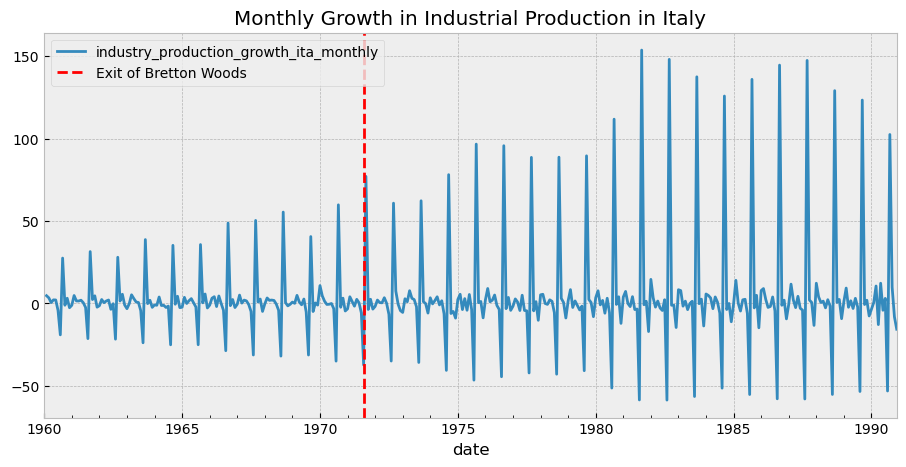

In [32]:
ax=merged.plot(kind='line', x='date', y='industry_production_growth_ita_monthly', legend=True, title= "Monthly Growth in Industrial Production in Italy", figsize=(11, 5))
ax.xaxis.set_major_locator(YearLocator(base=5))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

tick_years = range(1960, 1991, 5)
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in tick_years]))
ax.set_xticklabels(tick_years)

plt.axvline(pd.to_datetime('1971-08'), color='red', linestyle='--', lw=2, label='Exit of Bretton Woods')
plt.legend()
plt.savefig('Monthly growth in industrial production.png')

7. Growth in industrial production versus 12 months ago

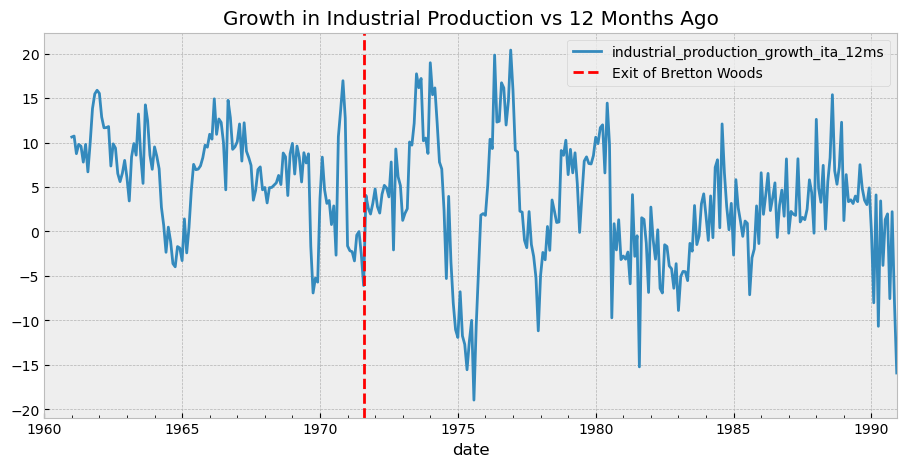

In [33]:
ax=merged.plot(kind='line', x='date', y='industrial_production_growth_ita_12ms', legend=True, title= "Growth in Industrial Production vs 12 Months Ago", figsize=(11, 5))
ax.xaxis.set_major_locator(YearLocator(base=5))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

tick_years = range(1960, 1991, 5)
ax.set_xticks(pd.to_datetime([f"{year}-01-01" for year in tick_years]))
ax.set_xticklabels(tick_years)

plt.axvline(pd.to_datetime('1971-08'), color='red', linestyle='--', lw=2, label='Exit of Bretton Woods')
plt.legend()
plt.savefig('Growth in industrial production versus 12 months ago.png')

# 7. Comparison Statistics<br>
For both the period before (data up to 07/1971) and (data start from 01/1973), calculate the standard deviation of:<br>
(i) The monthly growth of nominal exchange rates versus the US dollar.<br>
(ii) The monthly growth of real exchange rates versus the US dollar.<br>
(iii) The inflation rate.<br>
(iv) The difference between the inflation in your country versus the United States.<br>
(v) The 12-monthly industrial production growth.

The standard deviation is calculated by:
$$ \sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}} $$

(i) SD for the monthly growth of nominal exchange rates versus the US dollar.

In [34]:
def calculate_std_nominal_exchange_rate(merged, bretton_woods_end, post_bretton_woods_start):
    before_bw_std = merged[merged['date'] <= bretton_woods_end]['nominal_exchange_rate_growth_ita_monthly'].std()
    after_bw_std = merged[merged['date'] >= post_bretton_woods_start]['nominal_exchange_rate_growth_ita_monthly'].std()
    return before_bw_std, after_bw_std
    
std_nominal_exchange_rate = calculate_std_nominal_exchange_rate(
    merged, 
    bretton_woods_end='1971-07', 
    post_bretton_woods_start='1973-01'
)

print(std_nominal_exchange_rate)

(0.06082092830864543, 2.5168353417405935)


(ii) SD for the monthly growth of real exchange rates versus the US dollar.

In [35]:
def calculate_std_real_exchange_rate(merged, bretton_woods_end, post_bretton_woods_start):
    before_bw_std = merged[merged['date'] <= bretton_woods_end]['real_exchange_rate_growth_ita_monthly'].std()
    after_bw_std = merged[merged['date'] >= post_bretton_woods_start]['real_exchange_rate_growth_ita_monthly'].std()
    return before_bw_std, after_bw_std

std_real_exchange_rate = calculate_std_real_exchange_rate(
    merged, 
    bretton_woods_end='1971-07', 
    post_bretton_woods_start='1973-01'
)

print(std_real_exchange_rate)

(0.398475287984045, 2.683436199255715)


(iii) SD for the inflation rate in Italy.

In [36]:
def calculate_std_inflation_rate(merged, bretton_woods_end, post_bretton_woods_start):
    before_bw_std = merged[merged['date'] <= bretton_woods_end]['inflation_ita_monthly'].std()
    after_bw_std = merged[merged['date'] >= post_bretton_woods_start]['inflation_ita_monthly'].std()
    return before_bw_std, after_bw_std

std_inflation_rate = calculate_std_inflation_rate(
    merged, 
    bretton_woods_end='1971-07', 
    post_bretton_woods_start='1973-01'
)

print(std_inflation_rate)

(0.290846847576615, 0.6012566005638672)


(iv) SD for the difference between the inflation in Italy vs the United States.

In [37]:
merged['inflation_rate_diff'] = merged['inflation_ita_monthly'] - merged['inflation_us_monthly']
def calculate_std_inflation_rate_diff(merged, bretton_woods_end, post_bretton_woods_start):
    before_bw_std = merged[merged['date'] <= bretton_woods_end]['inflation_rate_diff'].std()
    after_bw_std = merged[merged['date'] >= post_bretton_woods_start]['inflation_rate_diff'].std()
    return before_bw_std, after_bw_std

std_inflation_rate_diff = calculate_std_inflation_rate_diff(
    merged, 
    bretton_woods_end='1971-07', 
    post_bretton_woods_start='1973-01'
)

print(std_inflation_rate_diff)

(0.4007939286929865, 0.5591857574585405)


(v) SD for the 12-monthly industrial production growth.

In [38]:
def calculate_std_12m_industrial_production_growth(merged, bretton_woods_end, post_bretton_woods_start):
    before_bw_std = merged[merged['date'] <= bretton_woods_end]['industrial_production_growth_ita_12ms'].std()
    after_bw_std = merged[merged['date'] >= post_bretton_woods_start]['industrial_production_growth_ita_12ms'].std()
    return before_bw_std, after_bw_std

std_12m_industrial_production_growth = calculate_std_12m_industrial_production_growth(
    merged, 
    bretton_woods_end='1971-07', 
    post_bretton_woods_start='1973-01'
)

print(std_12m_industrial_production_growth)

(5.26039719191528, 7.2096510737241815)


Report these numbers in a table, as well as the ratio of the standard deviation of each variable before and after Bretton Woods.

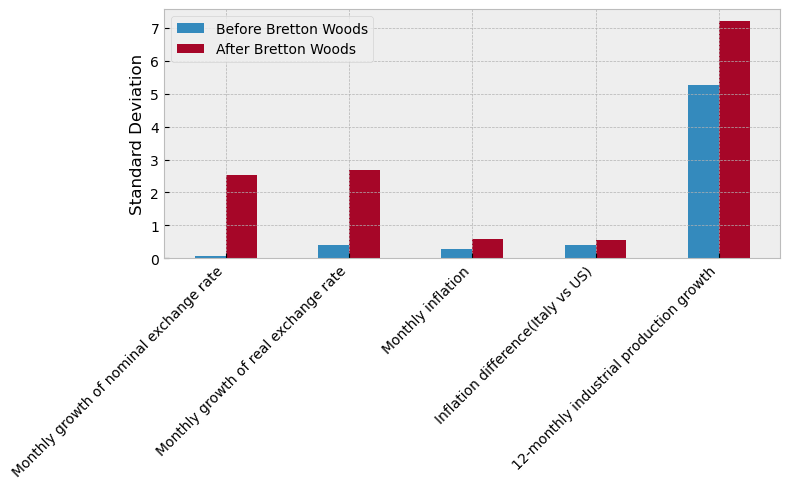

In [39]:
stds = {
    'Monthly growth of nominal exchange rate': std_nominal_exchange_rate,
    'Monthly growth of real exchange rate': std_real_exchange_rate,
    'Monthly inflation': std_inflation_rate,
    'Inflation difference(Italy vs US)': std_inflation_rate_diff,
    '12-monthly industrial production growth': std_12m_industrial_production_growth
}

std_ratios = {key: val[1] / val[0] for key, val in stds.items()}

std_table = pd.DataFrame(stds, index=['Before Bretton Woods', 'After Bretton Woods']).T

#We print a bar chart to compare the standard deviation of the five variables before and after Bretton Woods
fig, ax = plt.subplots(figsize=(8, 5))
std_table.plot(kind='bar', ax=ax)
ax.set_ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('std_table.png')

plt.show()

Below shows the whole table for standard deviations

In [40]:
std_table['Ratio After/Before'] = std_ratios.values()
std_table

,Before Bretton Woods,After Bretton Woods,Ratio After/Before
Monthly growth of nominal exchange rate,0.060821,2.516835,41.381074
Monthly growth of real exchange rate,0.398475,2.683436,6.734260
Monthly inflation,0.290847,0.601257,2.067262
Inflation difference(Italy vs US),0.400794,0.559186,1.395195
12-monthly industrial production growth,5.260397,7.209651,1.370553


Why might it be a good idea to exclude data from 08/1971 to 12/1972 for the above calculations?

08/1971 to 12/1972 is a transition period for the Bretton Woods System. All the member countries were adjusting to adapt the new floating rate regime, which increase volatility of the variables and make the data in this period less representative.

# 8. Hypothesis Testing
We conduct a hypothesis testing to test the null hypothesis that there is no change in nominal exchange rate, real exchange rates, inflation and production before and after Bretton Woods.

In [41]:
data_before_1971_8 = merged[merged['date'] < '1971-08']
data_after_1972_12 = merged[merged['date'] > '1972-12']

alpha = 0.05  # Significance level
t_stat_nominal, p_val_nominal = stats.ttest_ind(data_before_1971_8['exchange_rate_ita'], data_after_1972_12['exchange_rate_ita'])
t_stat_real, p_val_real = stats.ttest_ind(data_before_1971_8['real_exchange_rate_ita'], data_after_1972_12['real_exchange_rate_ita'])
t_stat_inflation, p_val_inflation = stats.ttest_ind(data_before_1971_8['inflation_ita_monthly'].iloc[1:], data_after_1972_12['inflation_ita_monthly'])
t_stat_production, p_val_production = stats.ttest_ind(data_before_1971_8['industrial_production_ita'], data_after_1972_12['industrial_production_ita'])

In [42]:
print("Hypothesis Test Results:")
print("Nominal Exchange Rate:")
print("  t-statistic:", t_stat_nominal)
print("  p-value:", p_val_nominal)
if p_val_nominal < alpha:
    print("  Reject null hypothesis: There is a significant change in Nominal Exchange Rate.")
else:
    print("  Fail to reject null hypothesis: There is no significant change in Nominal Exchange Rate.")

print("\nReal Exchange Rate:")
print("  t-statistic:", t_stat_real)
print("  p-value:", p_val_real)
if p_val_real < alpha:
    print("  Reject null hypothesis: There is a significant change in Real Exchange Rate.")
else:
    print("  Fail to reject null hypothesis: There is no significant change in Real Exchange Rate.")

print("\nInflation:")
print("  t-statistic:", t_stat_inflation)
print("  p-value:", p_val_inflation)
if p_val_inflation < alpha:
    print("  Reject null hypothesis: There is a significant change in Inflation.")
else:
    print("  Fail to reject null hypothesis: There is no significant change in Inflation.")

print("\nProduction:")
print("  t-statistic:", t_stat_production)
print("  p-value:", p_val_production)
if p_val_production < alpha:
    print("  Reject null hypothesis: There is a significant change in Production.")
else:
    print("  Fail to reject null hypothesis: There is no significant change in Production.")

Hypothesis Test Results:
Nominal Exchange Rate:
  t-statistic: -15.650974415940121
  p-value: 2.6320433203162914e-42
  Reject null hypothesis: There is a significant change in Nominal Exchange Rate.

Real Exchange Rate:
  t-statistic: -15.994903737006728
  p-value: 1.076840249832864e-43
  Reject null hypothesis: There is a significant change in Real Exchange Rate.

Inflation:
  t-statistic: -12.077125105980903
  p-value: 2.472523391705969e-28
  Reject null hypothesis: There is a significant change in Inflation.

Production:
  t-statistic: -23.4366112499651
  p-value: 6.3048373843802376e-74
  Reject null hypothesis: There is a significant change in Production.
